In [26]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Linear_Regression/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [29]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


(array([3.908e+03, 3.110e+02, 5.700e+01, 2.500e+01, 1.900e+01, 1.700e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  20000.,  908000., 1796000., 2684000., 3572000., 4460000.,
        5348000., 6236000., 7124000., 8012000., 8900000.]),
 <BarContainer object of 10 artists>)

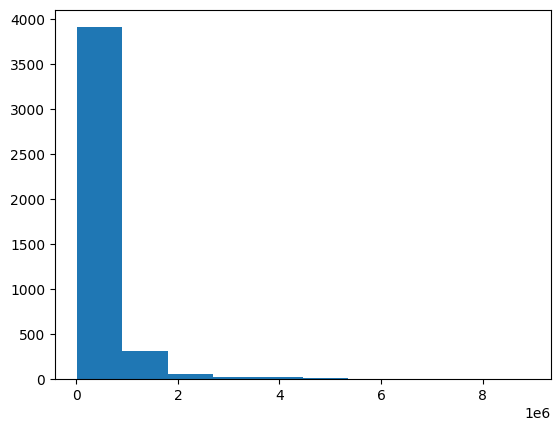

In [31]:
import matplotlib.pyplot as plt

plt.hist(df['selling_price'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [33]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [35]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [36]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['name'] = lb.fit_transform(df['name'])
df['fuel'] =  lb.fit_transform(df['fuel'])
df['seller_type'] = lb.fit_transform(df['seller_type'])
df['owner'] = lb.fit_transform(df['owner'])
df['transmission'] = lb.fit_transform(df['transmission'])

In [38]:
df.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,1.000000,-0.051902,-0.077598,0.126203,-0.083927,0.140802,0.087785,0.032819
year,-0.051902,1.000000,0.413922,-0.419688,-0.120002,-0.098352,-0.143800,-0.414705
selling_price,-0.077598,0.413922,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840
km_driven,0.126203,-0.419688,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115
fuel,-0.083927,-0.120002,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910
seller_type,0.140802,-0.098352,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681
transmission,0.087785,-0.143800,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893
owner,0.032819,-0.414705,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000


In [39]:
X = df[['name','year','km_driven','fuel','seller_type','transmission','owner']]
y = df[['selling_price']]

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   name          4340 non-null   int64
 1   year          4340 non-null   int64
 2   km_driven     4340 non-null   int64
 3   fuel          4340 non-null   int64
 4   seller_type   4340 non-null   int64
 5   transmission  4340 non-null   int64
 6   owner         4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [42]:
X_train.shape

(3255, 7)

In [43]:
y_train.shape

(3255, 1)

In [44]:
from sklearn.preprocessing import StandardScaler

ss1 = StandardScaler()
ss2 = StandardScaler()

X_train =  ss1.fit_transform(X_train)
y_train = ss2.fit_transform(y_train)

X_test =  ss1.transform(X_test)
y_test = ss2.transform(y_test)


In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X_train, y_train)


In [46]:
model.coef_

array([[-0.0260385 ,  0.2665915 , -0.08205099, -0.2459735 , -0.01664342,
        -0.4709811 , -0.03128967]])

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print('mae is:',mae)

mse = mean_squared_error(y_test, y_pred)
print('mse is:',mse)

rmse = np.sqrt(mse)
print('rmse is:',rmse)

mae is: 0.37401327683387636
mse is: 0.509712364265191
rmse is: 0.7139414291559154
